In [1]:
!pip uninstall opencv-python -y

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72


In [2]:
!pip uninstall numpy -y

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


In [3]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)


In [4]:
!pip install opencv-python==4.7.0.72

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl.metadata (18 kB)
Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [5]:
!pip install matplotlib

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
X_train[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [9]:
X_train = X_train / 255.0
X_train[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [10]:
X_test[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [11]:
X_test = X_test / 255.0
X_test[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train_flat = X_train.reshape(-1, 28*28)
X_train_flat.shape

(60000, 784)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_test_flat = X_test.reshape(-1, 28*28)
X_test_flat.shape

(10000, 784)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        1024,
        input_shape=(784,),
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(
        512,
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(
        256,
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(
        10,
        kernel_initializer='glorot_uniform',
        activation='softmax'
    )
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

In [19]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [20]:
model.fit(
    X_train_flat,
    y_train,
    epochs=30,
    batch_size=2048,
    validation_data=(X_test_flat, y_test),
    callbacks=[
        reduce_lr,
        checkpoint
    ]
)

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.9391 - accuracy: 0.7033
Epoch 1: val_loss improved from inf to 0.38971, saving model to best_model.h5
30/30 [==============================] - 7s 198ms/step - loss: 0.9391 - accuracy: 0.7033 - val_loss: 0.3897 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.8967
Epoch 2: val_loss improved from 0.38971 to 0.20602, saving model to best_model.h5
30/30 [==============================] - 6s 191ms/step - loss: 0.3442 - accuracy: 0.8967 - val_loss: 0.2060 - val_accuracy: 0.9387 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.2556 - accuracy: 0.9244
Epoch 3: val_loss improved from 0.20602 to 0.16141, saving model to best_model.h5
30/30 [==============================] - 6s 195ms/step - loss: 0.2556 - accuracy: 0.9244 - val_loss: 0.1614 - val_accuracy: 0.9528 - lr: 0.0010
Epoch 4/30
30/30 [==========================

In [21]:
loss, accuracy = model.evaluate(
    X_test_flat,
    y_test,
    batch_size=2048
)

print(f'테스트 데이터 정확도: {accuracy*100:.2f}%')

5/5 [==============================] - 0s 48ms/step - loss: 0.0599 - accuracy: 0.9832
테스트 데이터 정확도: 98.32%


In [22]:
idx = np.random.choice(
    len(X_test_flat),
    32,
    replace=False
)
idx

array([7722, 5548, 2952, 4417, 7211, 2619, 6959, 4493, 7042,  228, 1596,
       2271, 5193, 5307, 7828, 1204,  719, 4913, 7096, 4361,  983, 2486,
       4535, 8196, 5212, 8944, 4928,  663, 9003, 8038, 7601, 4245])

In [23]:
x_sample = X_test_flat[idx]
x_sample[0:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [24]:
y_sample = y_test[idx]
y_sample

array([1, 8, 3, 9, 3, 0, 0, 7, 6, 1, 9, 8, 1, 0, 9, 3, 4, 7, 4, 0, 8, 6,
       3, 6, 3, 6, 3, 1, 1, 5, 0, 9], dtype=uint8)

In [25]:
predictions = model.predict(
    x_sample
)
predictions

1/1 [==============================] - 0s 127ms/step


array([[7.02895449e-08, 9.99993563e-01, 1.43489430e-07, 1.42835912e-08,
        5.66677784e-07, 5.31095736e-08, 2.33854905e-07, 3.23958625e-06,
        2.19501771e-06, 4.76998041e-09],
       [5.12398060e-07, 3.22941105e-07, 1.83327813e-06, 4.50997823e-06,
        8.51357953e-08, 1.34101072e-06, 1.30454316e-06, 3.46640583e-08,
        9.99988675e-01, 1.37754762e-06],
       [4.52339748e-08, 4.56378211e-06, 1.30359908e-07, 9.91343617e-01,
        7.43629913e-09, 8.59586988e-03, 6.45606590e-08, 2.10641488e-07,
        1.35728797e-05, 4.19113640e-05],
       [3.25444773e-08, 3.09371440e-09, 4.07947631e-09, 1.26486191e-06,
        4.21754294e-07, 4.01169160e-08, 7.83520027e-10, 2.14826468e-06,
        2.11043428e-07, 9.99995828e-01],
       [1.16142873e-09, 6.83194159e-08, 2.52109889e-08, 9.99991536e-01,
        6.76900896e-11, 8.00626913e-06, 2.46653614e-10, 3.74624491e-08,
        1.16328216e-07, 2.01217304e-07],
       [9.99984741e-01, 3.82125833e-08, 1.54169311e-06, 3.06135668e-08,
   

In [26]:
predicted_labels = np.argmax(
    predictions,
    axis=1
)
predicted_labels

array([1, 8, 3, 9, 3, 0, 0, 7, 6, 1, 9, 8, 1, 0, 9, 3, 4, 7, 4, 0, 8, 6,
       3, 6, 3, 6, 3, 1, 1, 5, 0, 9], dtype=int64)

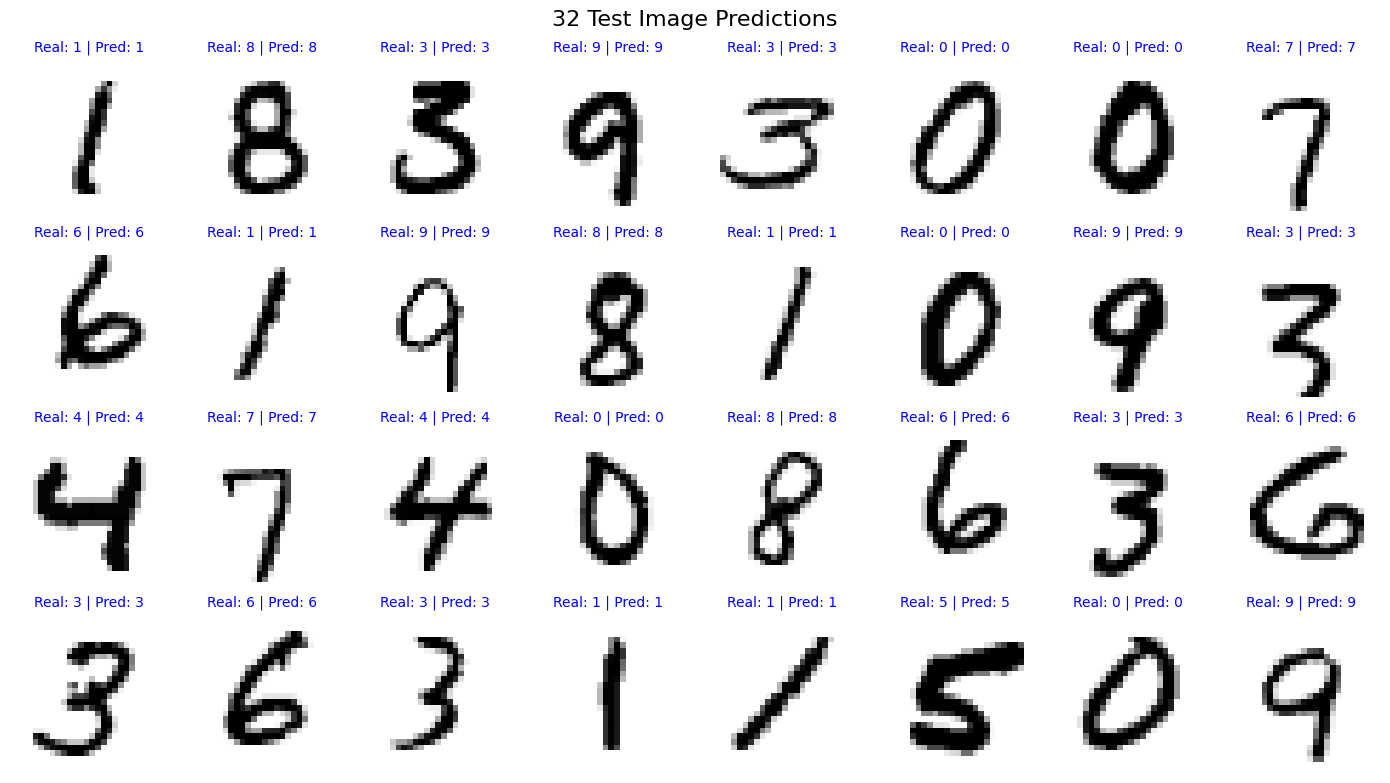

In [27]:
fig, axes = plt.subplots(
    4, 8,
    figsize=(14, 8)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        x_sample[i].reshape(28, 28),
        cmap='gray_r'
    )
    ax.axis('off')

    true_label = y_sample[i]
    pred_label = predicted_labels[i]

    ax.set_title(
    f'Real: {true_label} | Pred: {pred_label}',
    fontsize=10,
    color='blue' if true_label==pred_label else 'red'
    )

plt.suptitle(
    '32 Test Image Predictions',
    fontsize=16
)
plt.tight_layout()
plt.show()